# Data Visulaization: Ford GoBike Trip Data
## by Noha Salama

## Investigation Overview

In this presentation, I will be investigating a dataset related to Ford GoBike. The goal of this investigation is to analyze the trip duration using several variables.

## Dataset Overview

The Ford GoBike trip dataset is from 2019.<br><br>
It contains ride information about people using Ford GoBike. These information include the time when the ride has started and ended, places (including longtitude & latitude) where the ride has started and ended, the duration of the ride, etc... In addition to that, there are some information about the users like their gender, birth year, and their type (whether they are subscribers or customers).<br><br>
The original dataset consists of 183412 rows and 16 columns.<br><br>
There were some modifications in the dataset that were perfomed. These modifications include removing irrelevant/inaccurate parts from the datset and changing data types of some labels.
To prepare the dataset for analysis, it was cleansed as follows:
<ul><li>Remove bike trips that do not have <b>start_station_id</b>, <b>start_station_name</b>, <b>end_station_id</b> & <b>end_station_name</b></li>
<li>Remove bike trips whose memebers do not have <b>member_birth_year</b> & <b>member_gender</b> </li>
<li>Convert column types of <b>start_time</b> & <b>end_time</b> from string to date time</li></ul><br>

## Dataset Overview


I also did additional transformations throughout the exploratory analysis, which are:
<ul><li>Converting <b>duration_sec</b> to <b>duration_min</b></li>
<li>Removing all trips that lasted longer than 300 mins (outliers)</li>
<li>Removing all trips whose users are older than 76 (outliers)</li>
<li>Removing all trips whose users' gender is not identified (not useful)</li>
<li>Adding a new column <b>start_hour</b> which indicates the hour at which the trip started</li>
<li>Adding a new column <b>day</b> which indicates whether the trip took place on a weekday or a weekend</li>
<li>Adding a new column <b>member_age</b> which indicates the user's age</li></ul>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

Matplotlib is building the font cache; this may take a moment.


In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

#Remove rows
df.dropna(subset = ['start_station_id', 'start_station_name', 'end_station_id', 'end_station_name', 'member_birth_year', 'member_gender'], inplace=True)

#Convert column types
df['start_time'] = pd.to_datetime(df['start_time'], format='%Y-%m-%dT%H:%M:%S')
df['end_time'] = pd.to_datetime(df['end_time'], format='%Y-%m-%dT%H:%M:%S')

#Convert duration_sec to duration_min
df['duration_sec'] = df['duration_sec']/60
df.rename(columns={'duration_sec':'duration_min'}, inplace=True)

#Remove outliers
df = df[df['duration_min'] <= 300]
df = df[df['member_birth_year'] >= 1945]
df = df[df['member_gender'] != 'Other']

#Add new columns
df['start_hour'] = df['start_time'].dt.hour
day = df['start_time'].dt.dayofweek
df['day'] = day.apply(lambda x: 'weekend' if x==5 or x==6 else 'weekday')
df['member_age'] = (2021 - df['member_birth_year']).astype(int)

## Start Hour Count

This plot shows the trip count of each hour throughout the day. It is a bimodal distrbution. The peaks are at 8:00 o'clock in the morning and 17:00 o'clock in the evening.

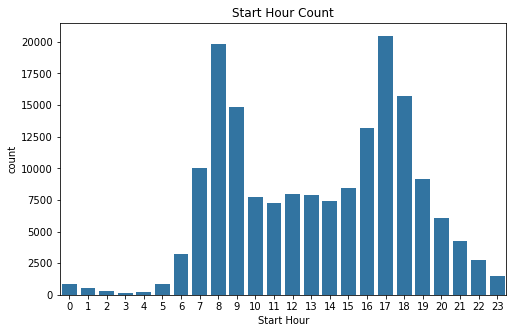

In [3]:
color = sb.color_palette()[0]
plt.figure(figsize = [8, 5])
sb.countplot(data = df, x = 'start_hour', color = color)
plt.xlabel('Start Hour')
plt.title("Start Hour Count");

## Day of the Week Count vs User Type

The next plot shows day of the week versus user type. Users (especially subscribers) tend to use GoBike more during week days. Taking the findings of the previous plot for the start hour also into consideration, we can assume that members use Ford GoBike as a ride to their school/college/work and back home. 

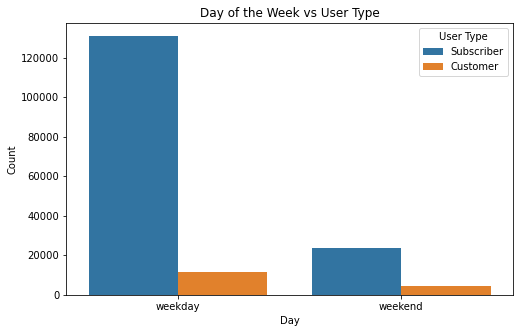

In [4]:
color = sb.color_palette()[0]
plt.figure(figsize = [8, 5])
ax = sb.countplot(data = df, x = 'day', hue = 'user_type')
ax.legend(title = 'User Type')
plt.xlabel('Day')
plt.ylabel('Count')
plt.title("Day of the Week vs User Type");

## User Type vs Trip Duration

This plot shows user type versus trip duration. The viloin plot for customers is wider than the one for subscribers. Also, susbcibers' trips on average last less than customers' trips.  As stated in the previous part, one can say that subscribers use GoBike as a quick and easy mode of transport to their destination for their daily activities. Also, I assume that subscribers are used to riding bikes and that's why they might be cycling faster.

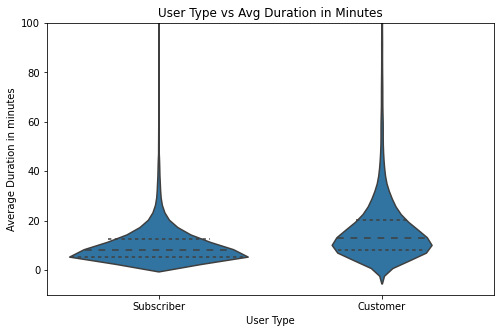

In [5]:
color = sb.color_palette()[0]
plt.figure(figsize = [8, 5])
sb.violinplot(data = df, x = 'user_type', y = 'duration_min', color = color, inner = 'quartile')
plt.ylim(-10, 100)
plt.xlabel('User Type')
plt.ylabel('Average Duration in minutes')
plt.title("User Type vs Avg Duration in Minutes");

## Day of the Week vs User Type vs Trip Duration

The final plot shows the relationship between the day of the week, the user type and the duration. The day of the week and the user type strenghten each other and can indicate the duration of the trip, which is the feature of intereset. Subscribers' rides durations are slightly longer on weekends (not that significant though). Customers' rides last longer than suscribers' rides. Also, customers ride longer during weekends.

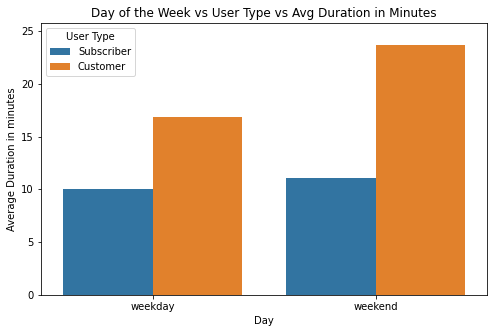

In [6]:
color = sb.color_palette()[0]
plt.figure(figsize = [8, 5])
ax = sb.barplot(data = df, x = 'day', y = 'duration_min', hue = 'user_type', errwidth = 0)
ax.legend(title = 'User Type')
plt.xlabel('Day')
plt.ylabel('Average Duration in minutes')
plt.title("Day of the Week vs User Type vs Avg Duration in Minutes");

## Conclusion

In conclusion, we have observed that customers use GoBike for longer durations on weekends which makes sense if they use it for wandering around the city. Generally, subscribers use GoBike for shorter durations.<br>
We have also found that the peaks for using GoBike are at 8:00 o'clock in the morning and 17:00 o'clock in the evening and that subscribers use GoBike more on weekdays. This might indicate that they use GoBike as a transportation to/from school/college/work.<br><br>
I would suggest to make offers for subscribers on weekdays. For customers, applying offers on weekends would be more suitable.

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [ ]:
!jupyter nbconvert explanation.ipynb --to slides --post serve --no-input --no-prompt